In [2]:
# linear regression for diabetes dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
# load and prepare daa

df = pd.read_csv('diabetes.csv')
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [4]:
# Train-test split

x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)
print(f'Training samples: {len(x_train)}')
print(f'Testing samples: {len(x_test)}')

Training samples: 614
Testing samples: 154


In [5]:
# standardlize Insulin (fit on train,transform both)

scaler = StandardScaler()
x_train["Insulin"] = scaler.fit_transform(x_train[['Insulin']])
x_test["Insulin"] = scaler.transform(x_test[['Insulin']]) # use same scaler


In [6]:
# train full model(all features)
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


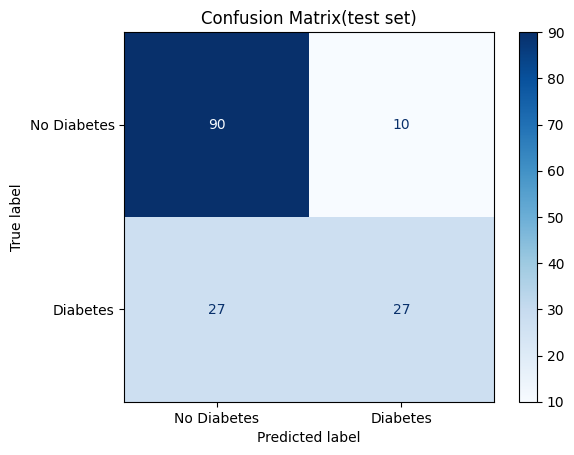


=== Test Set Performance ===

Classification Report: 

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       100
           1       0.73      0.50      0.59        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



In [7]:
# Evalution on test set
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm,display_labels=['No Diabetes','Diabetes']).plot(cmap="Blues")
plt.title("Confusion Matrix(test set)")
plt.show()

print("\n=== Test Set Performance ===")
print("\nClassification Report: \n")
print(classification_report(y_test,y_pred))

In [8]:
# logistic Regression Curve (Glucose only - for visualisation)

# Extract Glucose from train/test set

x_train_glucose = x_train[["Glucose"]].copy()
x_test_glucose = x_test[["Glucose"]].copy()

In [9]:
# train a seperate single feature model for visualization

model_glucose = LogisticRegression(max_iter=500)
model_glucose.fit(x_train_glucose,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [10]:
# Create Smooth Curve

Glucose_min = df['Glucose'].min()
Glucose_max = df['Glucose'].max()
glucose_values = np.linspace(Glucose_min,Glucose_max,200).reshape(-1,1)
y_curve = model_glucose.predict_proba(glucose_values)[:,1]


c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


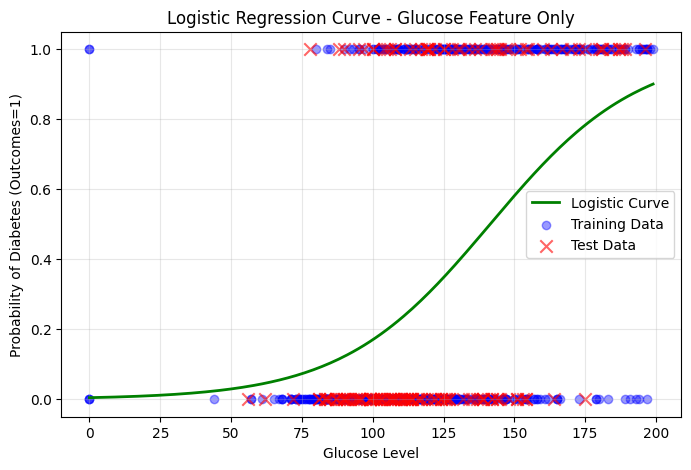

In [12]:
# plot sigmiod curve with train/test slit visualization

plt.figure(figsize=(8,5))
plt.plot(glucose_values,y_curve,color='green',linewidth=2,label="Logistic Curve")
plt.scatter(x_train_glucose,y_train,color="blue",alpha=0.4,label="Training Data")
plt.scatter(x_test_glucose,y_test,color="red",alpha=0.6,marker='x',s=80,label="Test Data")
plt.xlabel("Glucose Level")
plt.ylabel("Probability of Diabetes (Outcomes=1)")
plt.title("Logistic Regression Curve - Glucose Feature Only")
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()